In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [33]:
data=pd.read_csv('train (1).csv')
test=pd.read_csv('test (1).csv')

In [34]:
data_X=data.drop(['label'],axis=1).as_matrix()

In [51]:
data_s=data_X.reshape(data_X.shape[0], 28, 28)

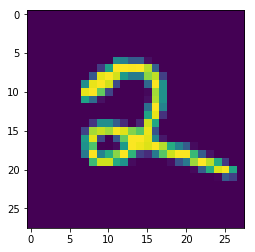

In [43]:
plt.imshow(data_s[41000])

In [52]:
X_train,X_test,y_train,y_test=train_test_split(data_X,data.label)

In [53]:
scaler=MinMaxScaler()
Xs_train=scaler.fit_transform(X_train)
Xs_test=scaler.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
params={'max_iter':[55,60,65,70]}
grid=GridSearchCV(MLPClassifier(),params,cv=5,n_jobs=-1)
grid.fit(Xs_train,y_train)
print('best parameters: {}'.format(grid.best_params_))
print('mean train score: {}'.format(grid.cv_results_['mean_train_score']))
print('mean test score: {}'.format(grid.cv_results_['mean_test_score']))

In [56]:
params={'hidden_layer_sizes':[100,200,300,400,500,600],'alpha':[0.0001,0.001,0.01,0.1,0.5,0.9]}
grid=GridSearchCV(MLPClassifier(max_iter=60),params,cv=5,n_jobs=-1)
grid.fit(Xs_train,y_train)
print('best parameters: {}'.format(grid.best_params_))
print('mean train score: {}'.format(grid.cv_results_['mean_train_score']))
print('mean test score: {}'.format(grid.cv_results_['mean_test_score']))

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anacond

best parameters: {'alpha': 0.001, 'hidden_layer_sizes': 500}
mean train score: [1.         1.         1.         0.9981591  0.99939688 0.99937314
 0.99907922 0.99937306 0.99789706 0.99990478 0.99976989 0.99956353
 0.9999127  0.99945233 0.99955556 0.99864298 0.99888098 0.99813503
 0.99542883 0.99496055 0.99556362 0.99450827 0.99549219 0.9948413
 0.97276239 0.97366712 0.97396068 0.97411151 0.97397663 0.97323867
 0.95863549 0.95956413 0.95979406 0.95686563 0.9601832  0.95811947]
mean test score: [0.96961905 0.97225397 0.97473016 0.97231746 0.97422222 0.97361905
 0.96733333 0.97225397 0.97174603 0.97492063 0.97609524 0.9752381
 0.97180952 0.9728254  0.97273016 0.97196825 0.97355556 0.97257143
 0.97155556 0.97       0.97314286 0.97133333 0.97349206 0.97371429
 0.96015873 0.9607619  0.96209524 0.96203175 0.96206349 0.96114286
 0.94993651 0.95038095 0.95066667 0.94777778 0.95177778 0.94968254]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [57]:
nn=MLPClassifier(max_iter=60,hidden_layer_sizes=512,alpha=0.001)
nn.fit(Xs_train,y_train)
print('train score: {}'.format(nn.score(Xs_train,y_train)))
print('test score: {}'.format(nn.score(Xs_test,y_test)))

train score: 1.0
test score: 0.9759047619047619


In [58]:
Xs=scaler.fit_transform(data.drop(['label'],axis=1))
test_s=scaler.transform(test)
nn.fit(Xs,data.label)
pred=nn.predict(test_s)


In [59]:
test['Label']=pred
test.index+=1

In [60]:
test['Label'].to_csv('predictions.csv',index_label='ImageID',header='Label')

In [ ]:
pred.shape